In [1]:
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from model_generation import pos_3
import kinetic_diagram_analyzer as kda

In [2]:
k12 = 1
k21 = 2
k23 = 3
k32 = 5
k13 = 7
k31 = 11

kvals = np.array([[0, k12, k13],
                  [k21, 0, k23],
                  [k31, k32, 0]])

knames = np.array([[0, "k12", "k13"],
                   ["k21", 0, "k23"],
                   ["k31", "k32", 0]])

rate_names = ["k12", "k21", "k23", "k32", "k13", "k31"]

In [3]:
G = nx.MultiDiGraph()
kda.generate_edges(G, knames, kvals, name_key='name', val_key='val')
pos = pos_3()

In [4]:
partials = kda.generate_partial_diagrams(G)
dir_partials = kda.generate_directional_partial_diagrams(partials)
state_probs = kda.calc_state_probabilities(G, dir_partials, key='val')
mult_funcs, norm_func = kda.calc_state_probabilities(G, dir_partials, key='name', output_strings=True)
sympy_funcs = kda.construct_sympy_funcs(mult_funcs, norm_func)
lambdify_funcs = kda.construct_lambdify_funcs(sympy_funcs, rate_names)

In [5]:
G.graph['partials'] = partials
G.graph['directional_partials'] = dir_partials
kda.add_node_attribute(G, mult_funcs, 'state_mult_func')
kda.add_node_attribute(G, G.number_of_nodes()*[norm_func], 'state_norm_func')
kda.add_node_attribute(G, state_probs, 'probability')
kda.add_node_attribute(G, sympy_funcs, 'sympy_func')
kda.add_node_attribute(G, lambdify_funcs, 'lambdify_func')

In [6]:
list(G.nodes(data=True))

[(0,
  {'state_mult_func': 'k21*k31+k21*k32+k23*k31',
   'state_norm_func': 'k21*k31+k21*k32+k23*k31+k12*k31+k12*k32+k13*k32+k13*k21+k12*k23+k13*k23',
   'probability': 0.42207792207792205,
   'sympy_func': (k21*k31 + k21*k32 + k23*k31)/(k12*k23 + k12*k31 + k12*k32 + k13*k21 + k13*k23 + k13*k32 + k21*k31 + k21*k32 + k23*k31),
   'lambdify_func': <function _lambdifygenerated(k12, k21, k23, k32, k13, k31)>}),
 (1,
  {'state_mult_func': 'k12*k31+k12*k32+k13*k32',
   'state_norm_func': 'k21*k31+k21*k32+k23*k31+k12*k31+k12*k32+k13*k32+k13*k21+k12*k23+k13*k23',
   'probability': 0.33116883116883117,
   'sympy_func': (k12*k31 + k12*k32 + k13*k32)/(k12*k23 + k12*k31 + k12*k32 + k13*k21 + k13*k23 + k13*k32 + k21*k31 + k21*k32 + k23*k31),
   'lambdify_func': <function _lambdifygenerated(k12, k21, k23, k32, k13, k31)>}),
 (2,
  {'state_mult_func': 'k13*k21+k12*k23+k13*k23',
   'state_norm_func': 'k21*k31+k21*k32+k23*k31+k12*k31+k12*k32+k13*k32+k13*k21+k12*k23+k13*k23',
   'probability': 0.2467532

In [7]:
edge_list = list(G.edges(data=True))
values = [e[2]['val'] for e in edge_list]

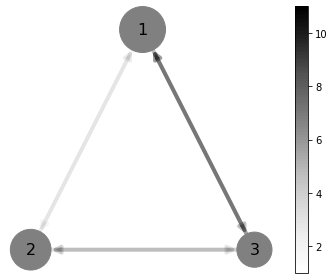

In [8]:
fig1 = plt.figure(figsize=(5, 4), tight_layout=True)
fig1.add_subplot(111)

node_sizes = 5e3*state_probs
node_list = [i for i in range(G.number_of_nodes())]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, nodelist=node_list, node_color='grey')

M = G.number_of_edges()
# edge_colors = range(M)
norm = np.array(values).sum(axis=0)
edge_alphas = np.array(values)/norm
# edges = nx.draw_networkx_edges(H, pos, node_size=node_sizes, width=4, arrow_style='->', arrowsize=15, edge_color=edge_colors, edge_cmap=plt.cm.get_cmap('Greys', 100))
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, width=4, arrow_style='->', arrowsize=15, edge_cmap=plt.cm.get_cmap('Greys', 100))

labels = {}
for i in range(G.number_of_nodes()):
    labels[i] = r"${}$".format(i+1)
nx.draw_networkx_labels(G, pos, labels, font_size=16)

for i in range(M):
    edges[i].set_alpha(edge_alphas[i])
    
pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.get_cmap('Greys', 100))
pc.set_array(edge_alphas*norm)
plt.colorbar(pc)
plt.axis('off')
plt.show()

In [9]:
key = 'name'

In [10]:
isinstance(key, str)

True

In [11]:
# edge_list = list(H.edges(data=True))
# for e in edge_list:
#     print("{} = {}".format(e[2]['name'], e[2]['val']))